# Make Results Figures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dataset = 'omniglot'
architecture = 'simple'
branches = 2

## Ensemble

In [3]:
# df = pd.read_csv('results/{}-{}/B{}-test.csv'.format(dataset, architecture, branches), header=None)

In [4]:
# df

In [5]:
# mean_acc = df.iloc[range(1, len(df.index)+1, 2), 2].astype('float32').mean()
# print(mean_acc)

In [6]:
# concat_acc = df.iloc[range(1, len(df.index)+1, 2), 1].astype('float32').mean()
# print(concat_acc)

## Baseline

In [16]:
baseline_acc = []
for i in range(1):
    df = pd.read_csv('results/{}-{}/train_{}.csv'.format(dataset, architecture, i+1))
    baseline_acc.append(df['acc'].iloc[-1])
baseline_acc = np.mean(baseline_acc)

In [17]:
print(baseline_acc_list)

[0.8299999999999998]


## Virtual Branching

In [18]:
vbranch_acc = []
shared_frac_list = [0, 0.25, 0.5, 0.75, 1]

for frac in shared_frac_list:
    arr = []
    for i in range(1):
        df = pd.read_csv('results/vb-{}-{}/B{}/S{:.2f}/train_{}.csv'.format(
                dataset,architecture, branches, frac, i+1))
        arr.append(df['acc_ensemble'].iloc[-1])
    vbranch_acc.append(np.mean(arr))

In [19]:
vbranch_acc

[0.8375, 0.825, 0.835, 0.8574999999999999, 0.85]

## Create Figure

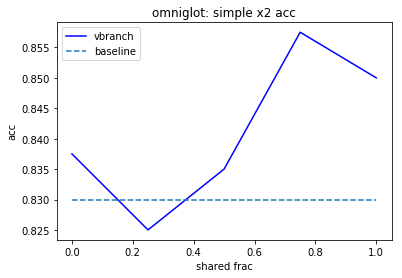

In [20]:
plt.plot(shared_frac_list, vbranch_acc, label='vbranch', color='blue')
# plt.plot(results_concat_list[:, 0], [concat_acc]*len(results_concat_list), label='ensemble', linestyle='--')

plt.plot(shared_frac_list, [baseline_acc]*len(shared_frac_list), label='baseline', linestyle='--')

plt.legend()
plt.xlabel('shared frac')
plt.ylabel('acc')
plt.title('{}: {} x{} acc'.format(dataset, architecture, branches))

plt.savefig('figs/{}-{}-{}-{}-results.png'.format(dataset, architecture, branches, method))
plt.show()